In [23]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


In [24]:
# x: Number of devices 
# Y: monthly Electric bill (USD)
# assume as linear regrassion

x_value=np.array([10,20,40,50,60,70])
y_value=np.array([4,9.2,25.3,40,50.6,60])
print("x_value :",x_value)
print("y_value :",y_value)

x_value : [10 20 40 50 60 70]
y_value : [ 4.   9.2 25.3 40.  50.6 60. ]


In [25]:
import random

# Generate and store the random values in an array
w = [random.randint(-50, 50) for i in range(1000)]
b = [random.randint(-50, 50) for i in range(1000)]

#print(w,"/n",b)

Text(0.5, 0, 'b')

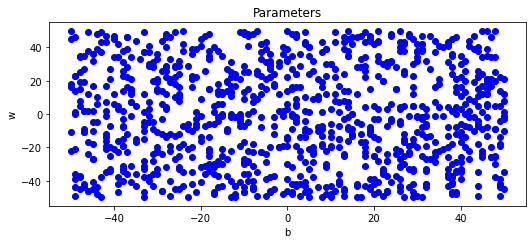

In [26]:
plt.scatter(w, b,c='b')
plt.title("Parameters")
plt.ylabel('w')
plt.xlabel('b')

Text(0.5, 0, 'amount(Rs)')

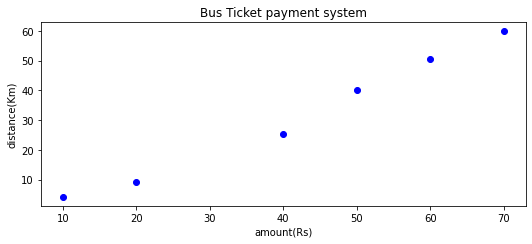

In [27]:
# Plot the data points
plt.scatter(x_value, y_value,c='b')
plt.title("Bus Ticket payment system")
plt.ylabel('distance(Km)')
plt.xlabel('amount(Rs)')

In [28]:
# defined Y^ (predcition value) for given w,b
def compute_model_prediction(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

# define cost funtion

def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [29]:
# let b=0 (when line cutting the root) so,  J(w,b) only depends on w
# value of W for each x
temp_w=[]
for i in w:
  temp_w.append(compute_model_prediction(x_value, i, 0))

#print(temp_w)

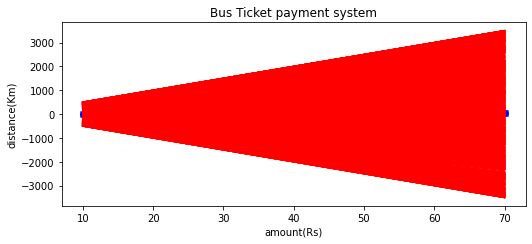

In [30]:
# Plot the data points
plt.scatter(x_value, y_value, marker='x', c='b',label='Actual Values')
plt.scatter(x_value, y_value,c='b')
plt.title("Bus Ticket payment system")
plt.ylabel('distance(Km)')
plt.xlabel('amount(Rs)')


# plot the prediction
for i in range(len(temp_w)):
  plt.plot(x_value, temp_w[i], c='r',label='Prediction')                     
                  
plt.show()                  
                   

In [31]:
# cost funtion for each w
temp_jwb=[]
for i in w:
  temp_jwb.append(compute_cost(x_value, y_value, i, 0))
#print(temp_jwb)

Text(0.5, 0, 'w')

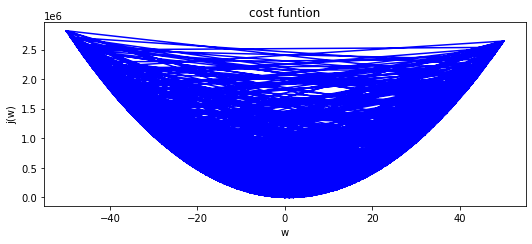

In [32]:
#print(w)
#print(b)
#print(temp_jwb)
# Plot j(w) vs w
plt.plot(w,temp_jwb,c='b')
plt.title("cost funtion")
plt.ylabel('j(w)')
plt.xlabel('w')

But here we have to consider parameter b as well

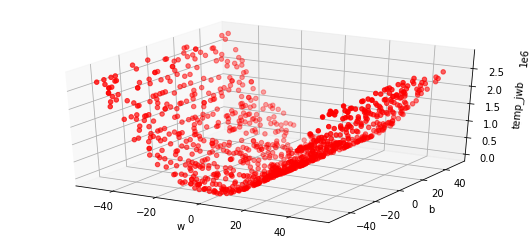

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(w, b, temp_jwb , c='r', marker='o')

# Adding labels to the x, y, and z axis
ax.set_xlabel('w')

ax.set_ylabel('b')
ax.set_zlabel('temp_jwb')

plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


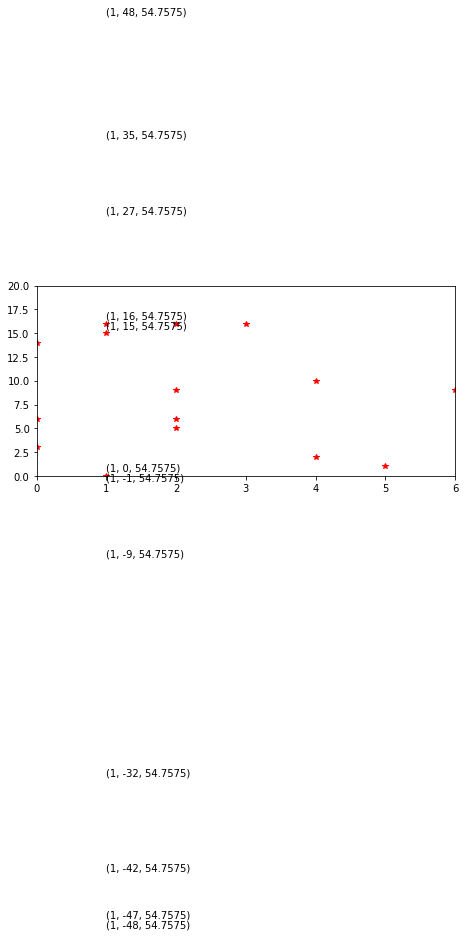

In [34]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(w, b, 'r*')
plt.axis([0, 6, 0, 20])

for i, j,k in zip(w, b,temp_jwb):
  if k==min(temp_jwb):
    plt.text(i, j+0.5, '({}, {}, {})'.format(i, j,k))

plt.show()

We have to compute the b value for the minimum cost function.

The above value can be taken as the least mean square error by w, b. Because w values are constant in this case, we can find the most efficient b value for each test case.

In [35]:
bOf_fwb=[]
for i,j,k in zip(w, b,temp_jwb):
  if k==min(temp_jwb):
    bOf_fwb.append(j)
print(bOf_fwb)

[0, -9, 16, -47, 15, 27, 35, -1, -48, 48, -32, -42]


In [36]:
#test accuracy for each b values
final_w=1
cost=[]
for b in bOf_fwb:
    cost.append(compute_cost(x_value, y_value, final_w, b))
print('cost:',cost)

#min cost => good accuracy

final_b=bOf_fwb[cost.index(min(cost))]

print("Perameter b :",final_b)

#so 

cost: [54.7575, 3.9074999999999993, 345.1574999999999, 682.2075, 319.50749999999994, 693.3074999999999, 1022.5074999999999, 45.107499999999995, 719.5574999999999, 1693.9574999999998, 241.9575, 510.4575]
Perameter b : -9


In [37]:
#our model is

def model(x):
    y=final_w*x+final_b
    #print("Y :",y)
    return y

In [38]:
# if x=80 then y=170
y=model(80)
print('Y:',y)

Y: 71
